<a href="https://colab.research.google.com/github/niki2805/Machine-learning/blob/main/LinR_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np


X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [5]:
y_train.shape

(80,)

In [11]:
class LinearRegression:
  def __init__(self,learning_rate = 0.01, n_iters = 1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None


  def fit(self, X, y):

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #Gradient Descent
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred -y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    y_approximated = np.dot(X, self.weights) + self.bias
    return y_approximated



In [12]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [16]:
predictions

array([  90.07616325,   65.22041584,  -45.69264845,  -82.48790623,
         20.93884211,  -73.92169888,  -14.9088548 ,  151.65264231,
         14.01725303, -102.2910724 ,   15.56846563,   41.60341884,
         26.20273534,   38.12032261,   37.38270397,  -37.35622388,
        -83.12304575,   26.30377956,   38.1309002 ,   29.45253316])

In [13]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [14]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [15]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("Accuracy:", accu)

MSE: 305.7719958301902
Accuracy: 0.9253717934621964


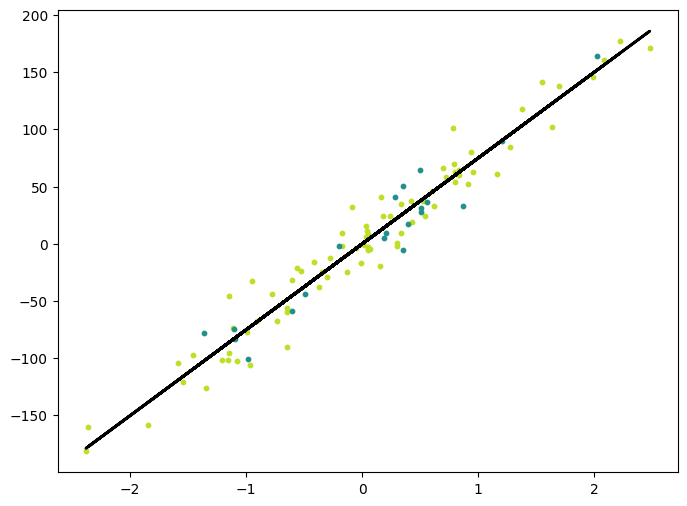

In [17]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()